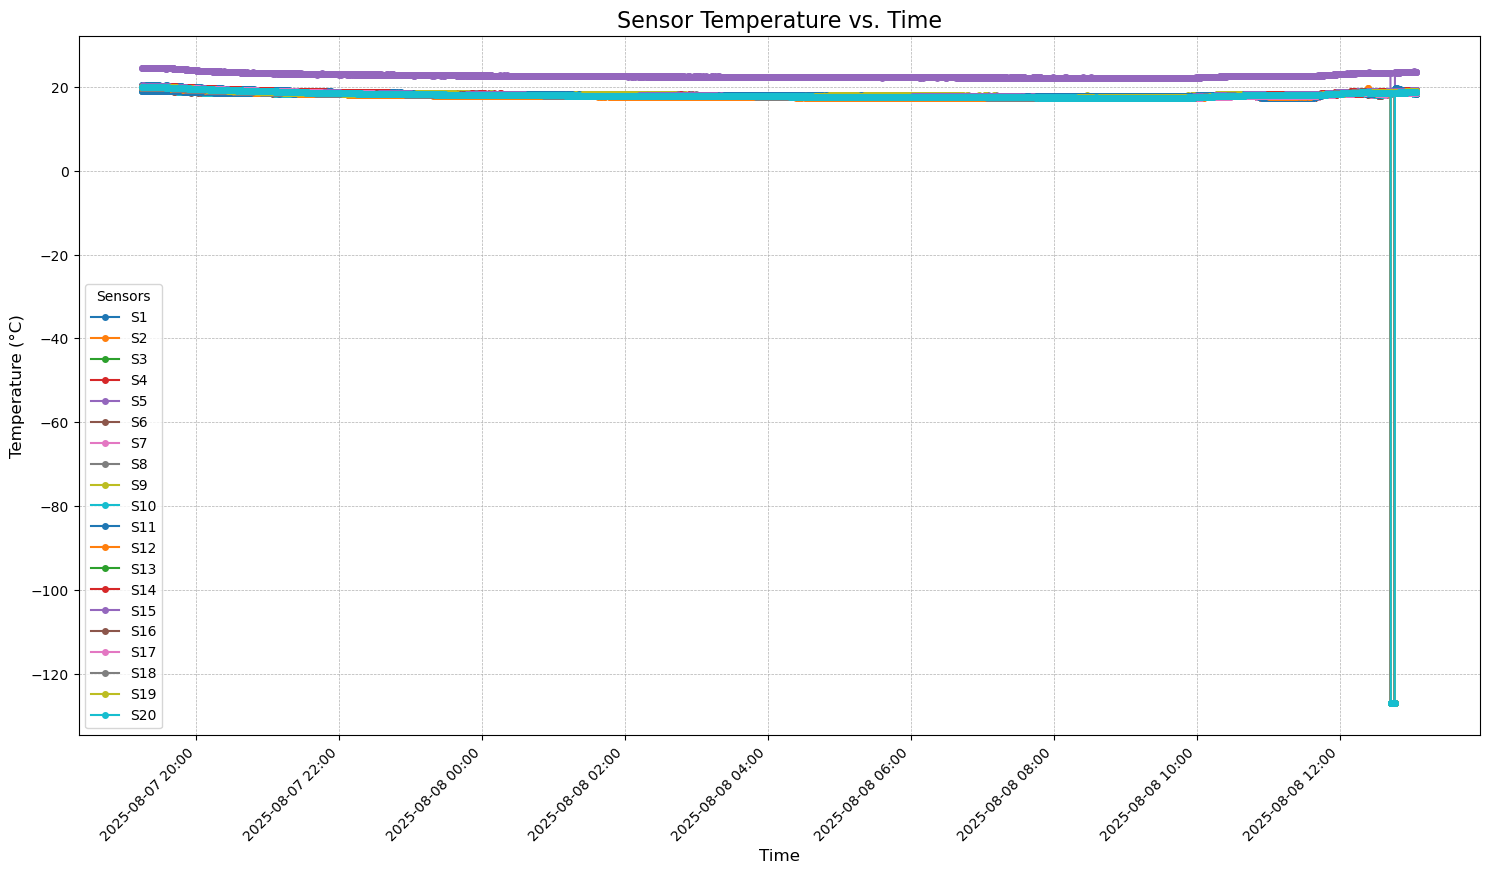

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Script Settings ---
input_csv_filename = 'Datalog_A.csv'
# ---------------------

try:
    # Load the CSV data into a pandas DataFrame
    df = pd.read_csv(input_csv_filename)

    # --- Data Preparation ---
    # Combine 'Date' and 'Time' columns into a single 'Timestamp' column
    # The to_datetime function converts the string data into a proper datetime object
    df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

    # Get a list of all columns that represent sensors (e.g., 'S0', 'S1', 'S2'...)
    sensor_columns = sorted([col for col in df.columns if col.startswith('S')], key=lambda x: int(x[1:]))

    # Convert all sensor columns to numeric data types.
    # 'coerce' will turn any values that can't be converted into 'Not a Number' (NaN)
    for col in sensor_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


    # --- Graphing ---
    # Set up the plot size for better readability
    plt.figure(figsize=(15, 8))

    # Loop through each sensor column and plot it against the Timestamp
    for sensor in sensor_columns:
        # The 'label' parameter is used to identify each line in the legend
        plt.plot(df['Timestamp'], df[sensor], marker='o', linestyle='-', markersize=4, label=sensor)

    # --- Formatting the Graph ---
    # Add a title and labels for the axes
    plt.title('Sensor Temperature vs. Time', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)

    # Add a legend to the plot to identify which line corresponds to which sensor
    # 'best' location automatically finds a spot with the least overlap
    plt.legend(title='Sensors', loc='best')

    # Improve grid and layout
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping

    # Format the x-axis to display dates nicely
    ax = plt.gca() # Get current axes
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right") # Rotate labels to prevent overlap

    # Display the plot
    plt.show()


except FileNotFoundError:
    print(f"Error: The file '{input_csv_filename}' was not found. Make sure it is in the same directory as the script.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

/tmp/ipykernel_4562/4168348276.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_df = df[sensor_columns].resample('1H').mean()


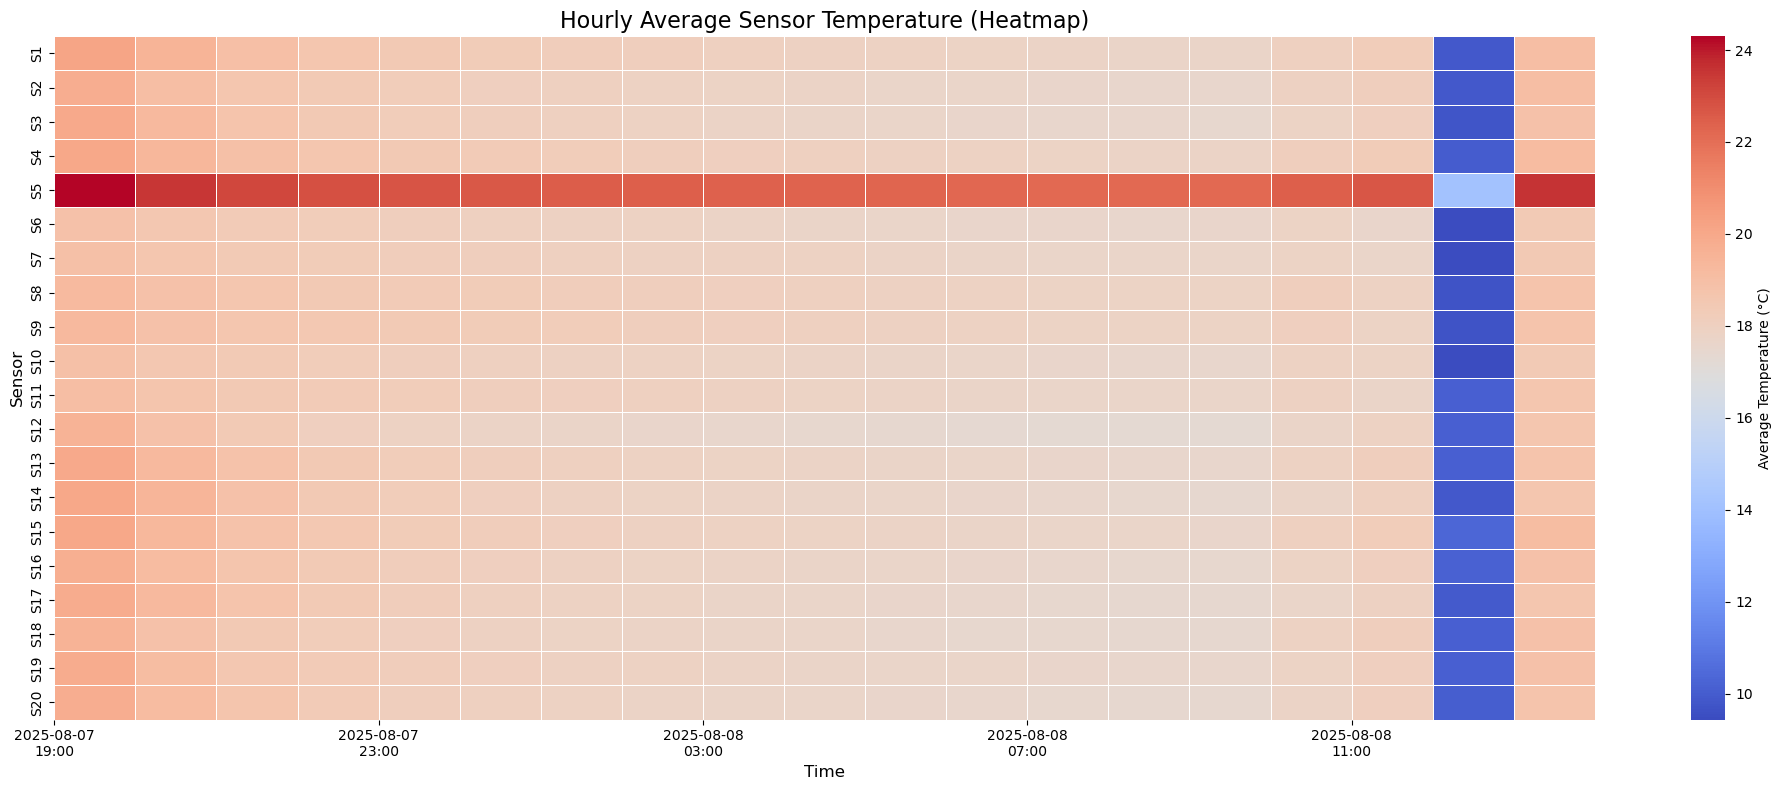

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- Script Settings ---
input_csv_filename = 'Datalog_A.csv' # Assuming Datalog.csv is the input
# ---------------------

try:
    # Load and prepare the data
    df = pd.read_csv(input_csv_filename)
    df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df.set_index('Timestamp', inplace=True)

    sensor_columns = sorted([col for col in df.columns if col.startswith('S')], key=lambda x: int(x[1:]))
    for col in sensor_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Resample to hourly averages
    resampled_df = df[sensor_columns].resample('1H').mean()
    heatmap_data = resampled_df.transpose()

    # --- Graphing ---
    plt.figure(figsize=(20, 8))
    ax = sns.heatmap(
        heatmap_data,
        cmap='coolwarm',
        linewidths=.5,
        cbar_kws={'label': 'Average Temperature (°C)'}
    )

    # --- (CORRECTED) X-AXIS FORMATTING ---
    label_every_n = 4
    tick_positions = range(0, len(heatmap_data.columns), label_every_n)
    
    # The fix is here: %h is changed to %H
    tick_labels = [heatmap_data.columns[i].strftime('%Y-%m-%d\n%H:%M') for i in tick_positions]

    # Apply the positions and labels to the x-axis
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=0, ha='center')

    # --- End of Formatting ---

    plt.title('Hourly Average Sensor Temperature (Heatmap)', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Sensor', fontsize=12)
    plt.tight_layout()

    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{input_csv_filename}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [22]:
import pandas as pd

# --- Settings ---
input_csv_filename = 'Datalog_A.csv'
output_csv_filename = 'Datalog_Filtered_A.csv'
temperature_threshold = -120.0
# ----------------

try:
    # 1. Load the CSV file into a DataFrame
    df = pd.read_csv(input_csv_filename)
    print(f"Successfully loaded '{input_csv_filename}'. Found {len(df)} rows.")

    # 2. Identify all sensor columns (e.g., S0, S1, S2...)
    sensor_columns = [col for col in df.columns if col.startswith('S')]
    
    # Ensure sensor columns are numeric for comparison, coercing errors
    for col in sensor_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 3. Filter the DataFrame
    # Create a boolean mask. It's 'True' for any row that has at least one
    # sensor reading below the threshold.
    mask_to_remove = (df[sensor_columns] < temperature_threshold).any(axis=1)

    # We use the tilde (~) to invert the mask, keeping only the rows
    # where ALL sensor values are >= the threshold.
    filtered_df = df[~mask_to_remove]
    
    print(f"Removed {mask_to_remove.sum()} rows with temperatures below {temperature_threshold}°C.")
    print(f"{len(filtered_df)} rows remaining.")

    # 4. Save the filtered data to a new CSV file
    if not filtered_df.empty:
        filtered_df.to_csv(output_csv_filename, index=False)
        print(f"Successfully saved filtered data to '{output_csv_filename}'.")
    else:
        print("No data remained after filtering. Output file was not created.")

except FileNotFoundError:
    print(f"Error: The file '{input_csv_filename}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'Datalog_A.csv'. Found 6989 rows.
Removed 24 rows with temperatures below -120.0°C.
6965 rows remaining.
Successfully saved filtered data to 'Datalog_Filtered_A.csv'.


/tmp/ipykernel_4562/1373334096.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_df = df[sensor_columns].resample('1H').mean()


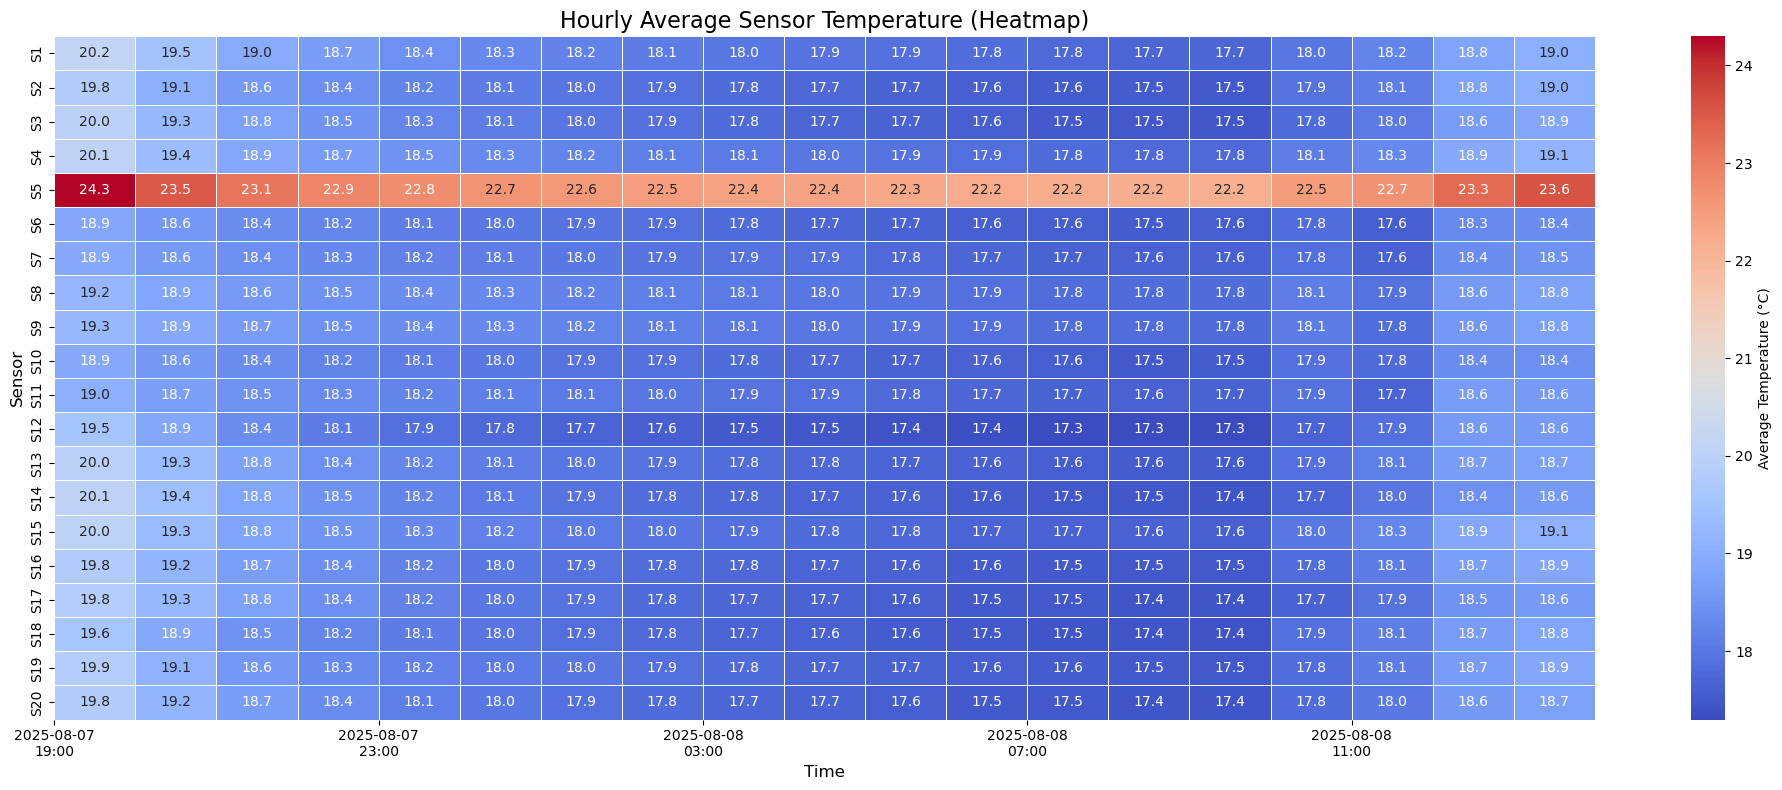

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- Script Settings ---
input_csv_filename = 'Datalog_Filtered_A.csv' # Assuming Datalog.csv is the input
# ---------------------

try:
    # Load and prepare the data
    df = pd.read_csv(input_csv_filename)
    df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df.set_index('Timestamp', inplace=True)

    sensor_columns = sorted([col for col in df.columns if col.startswith('S')], key=lambda x: int(x[1:]))
    for col in sensor_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Resample to hourly averages
    resampled_df = df[sensor_columns].resample('1H').mean()
    heatmap_data = resampled_df.transpose()

    # --- Graphing ---
    plt.figure(figsize=(20, 8))
    ax = sns.heatmap(
        heatmap_data,
        cmap='coolwarm',
        linewidths=.5,
        cbar_kws={'label': 'Average Temperature (°C)'},
        annot=True,   # This tells seaborn to write the data value in each cell.
        fmt='.1f'
    )

    # --- (CORRECTED) X-AXIS FORMATTING ---
    label_every_n = 4
    tick_positions = range(0, len(heatmap_data.columns), label_every_n)
    
    # The fix is here: %h is changed to %H
    tick_labels = [heatmap_data.columns[i].strftime('%Y-%m-%d\n%H:%M') for i in tick_positions]

    # Apply the positions and labels to the x-axis
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=0, ha='center')

    # --- End of Formatting ---

    plt.title('Hourly Average Sensor Temperature (Heatmap)', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Sensor', fontsize=12)
    plt.tight_layout()

    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{input_csv_filename}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")